У цій версії у порівнянні з попередньою я видалила наступні колонки (metadata about data quality)'st_pmdeclim','pl_orbperlim','pl_radelim','pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqterr1','pl_eqterr2','pl_eqtlim','st_logglim'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv(r'TESS.csv', comment='#' )

In [4]:
df.head()

,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,st_pmraerr2,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,-0.085,...,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,-0.102,...,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,-0.206,...,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,-0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,-0.069,...,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [5]:
unique_tfopwg_disp = df['tfopwg_disp'].unique()
print(unique_tfopwg_disp)

['FP' 'PC' 'KP' 'APC' 'FA' 'CP']


In [6]:
#planetary candidates (PC), false positives (FP), ambiguous planetary candidates (APC), and known planets (KP, previously identified) identified by the TESS mission so far. See column “TFOWPG Disposition” for classification.

In [7]:
df.columns.values

array(['toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec',
       'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec',
       'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid',
       'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim',
       'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt',
       'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_tmag', 'st_tmagerr1',
       'st_tmagerr2', 'st_tmaglim', 'st_dist', 'st_disterr1',
       'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1',
       'st_loggerr2', 'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'toi_created', '

In [8]:
len(df.columns)


65

In [9]:
df = df.drop(columns=['toi', 'tid','rastr','ra','decstr','st_pmra','st_pmdec','pl_tranmid','pl_insol','pl_eqt','st_dist','toi_created','rowupdate','st_pmralim','pl_tranmidlim','pl_trandeplim','pl_trandurh','pl_trandurhlim','st_tefflim','st_distlim','st_tmaglim','st_radlim','st_pmdeclim','pl_orbperlim','pl_radelim','pl_insolerr1','pl_insolerr2','pl_insollim','pl_eqterr1','pl_eqterr2','pl_eqtlim','st_logglim'],errors='ignore')

In [57]:
df.columns.values


array(['tfopwg_disp', 'dec', 'st_pmraerr1', 'st_pmraerr2', 'st_pmdeclim',
       'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_orbper', 'pl_orbperlim',
       'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandep',
       'pl_trandeperr1', 'pl_trandeperr2', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_insolerr1', 'pl_insolerr2',
       'pl_insollim', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_tmag',
       'st_disterr1', 'st_disterr2', 'st_teff', 'st_logg', 'st_logglim',
       'st_rad', 'st_raderr1', 'st_raderr2', 'disp_3class'], dtype=object)

In [58]:
mapping = {
    "CP": "Planet",
    "KP": "Planet",
    "PC": "Candidate",
    "APC": "Candidate",
    "FP": "False",
    "FA": "False"
}

df["disp_3class"] = df["tfopwg_disp"].map(mapping)
print(df["disp_3class"].value_counts())


disp_3class
Candidate    5139
False        1294
Planet       1266
Name: count, dtype: int64


# correlation analysis with heatmap

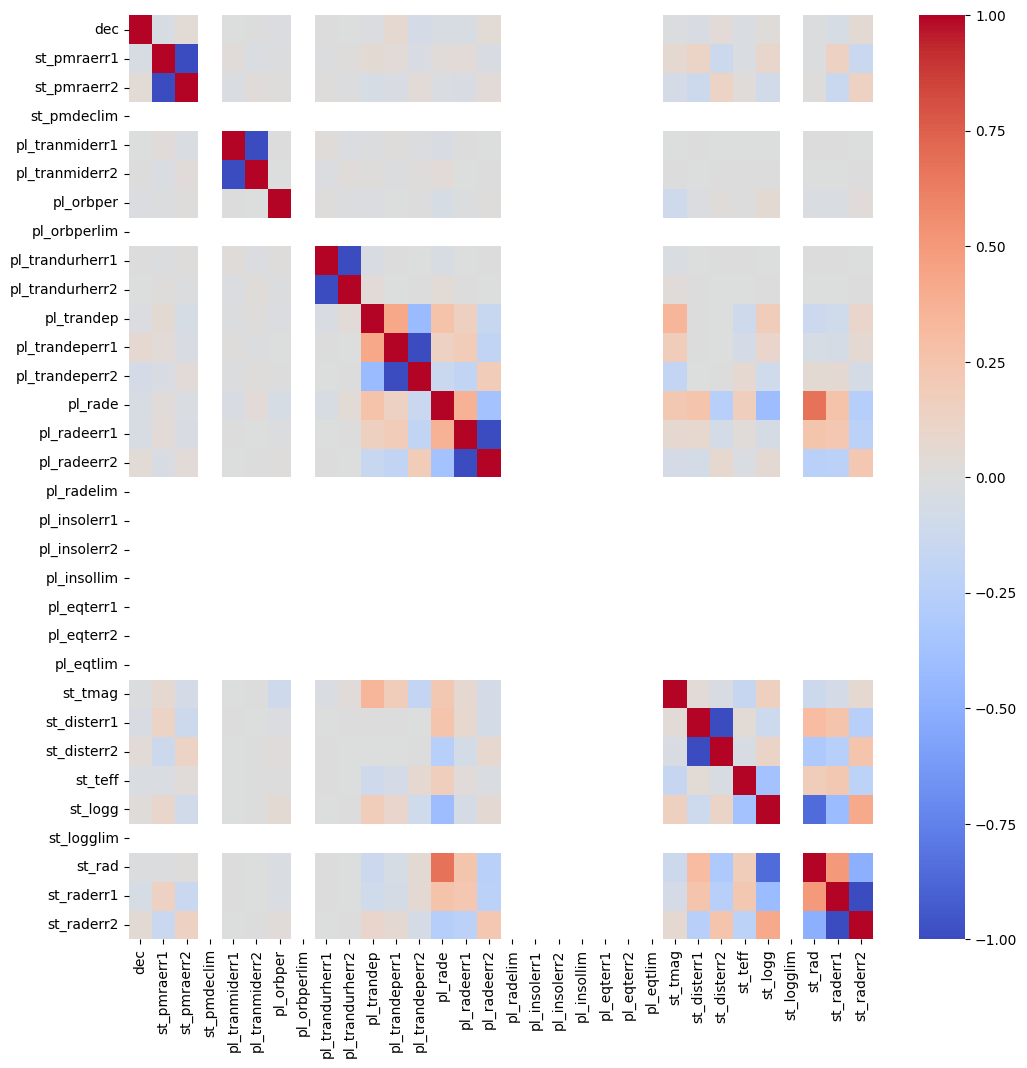

In [59]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()


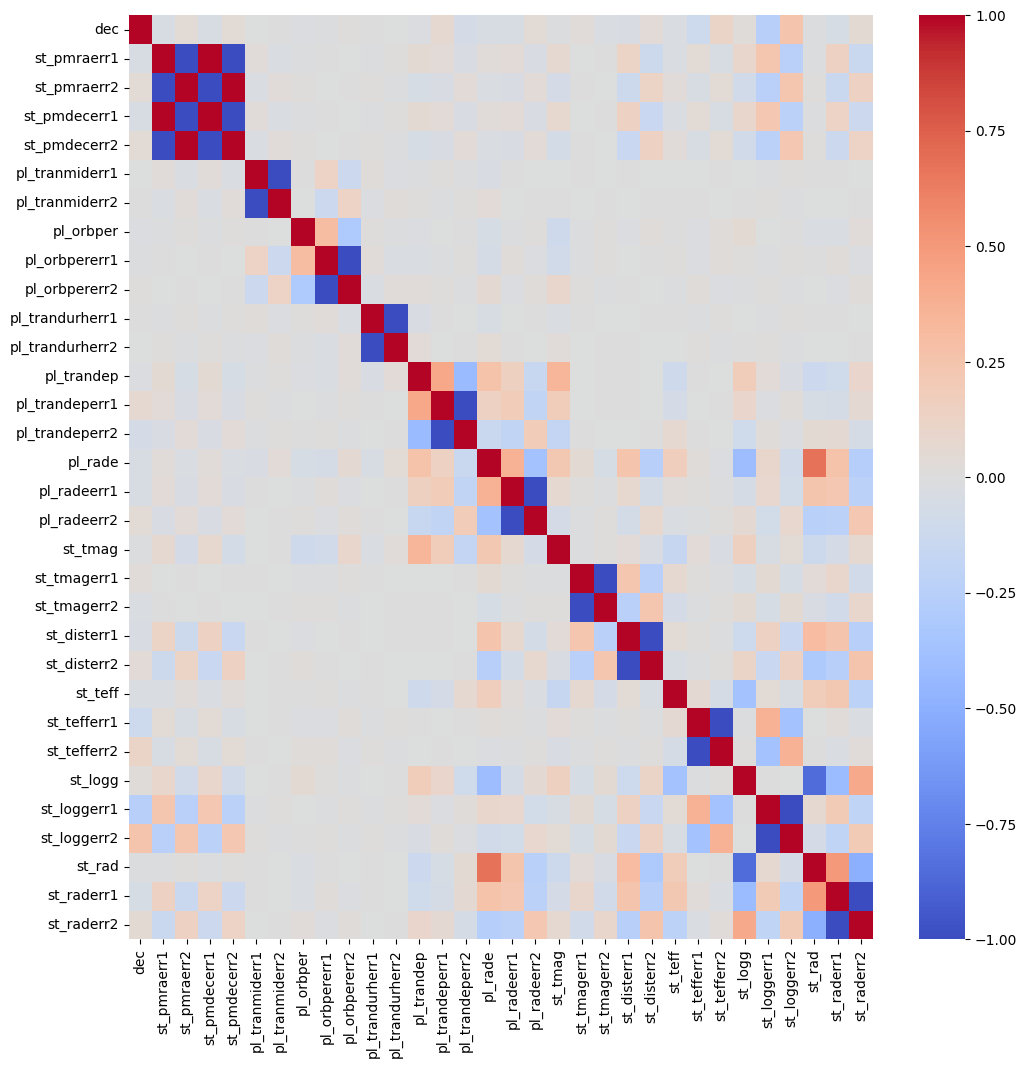

In [10]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()


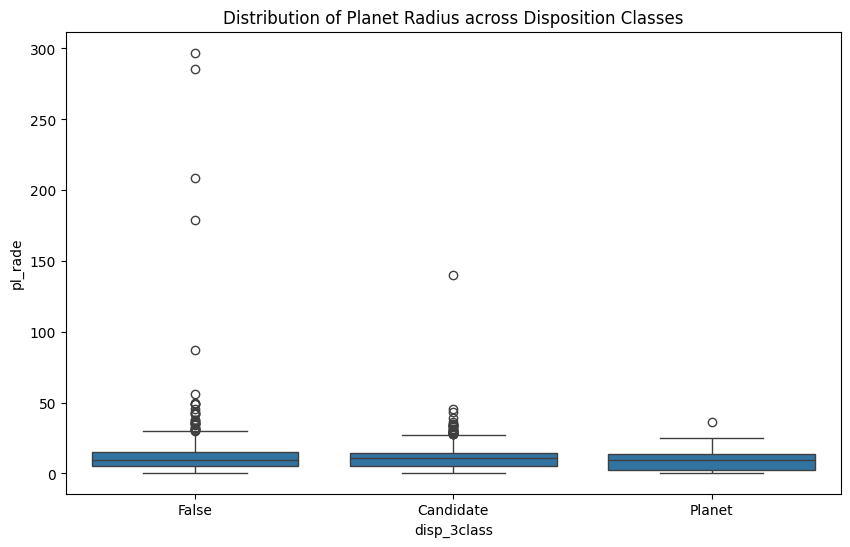

In [61]:
plt.figure(figsize=(10,6))
sns.boxplot(x="disp_3class", y="pl_rade", data=df)
plt.title("Distribution of Planet Radius across Disposition Classes")
plt.show()

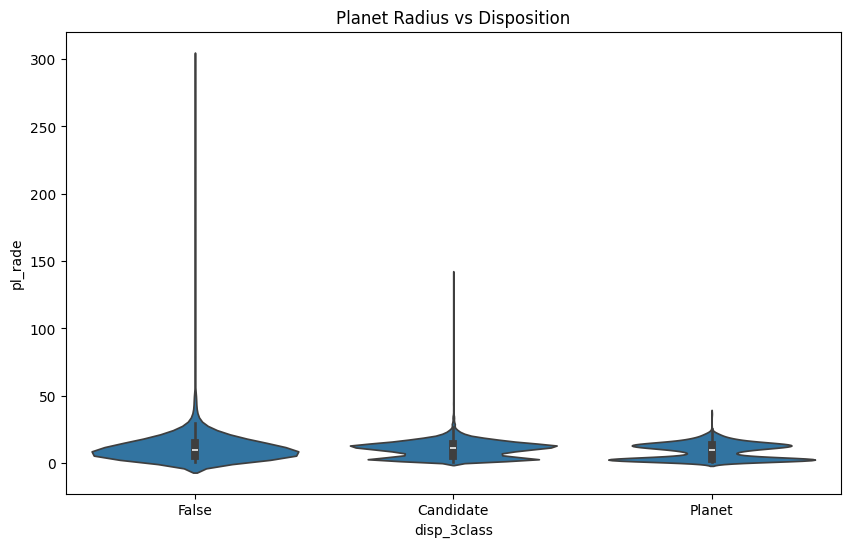

In [62]:
plt.figure(figsize=(10,6))
sns.violinplot(x="disp_3class", y="pl_rade", data=df, density_norm="width")
plt.title("Planet Radius vs Disposition")
plt.show()

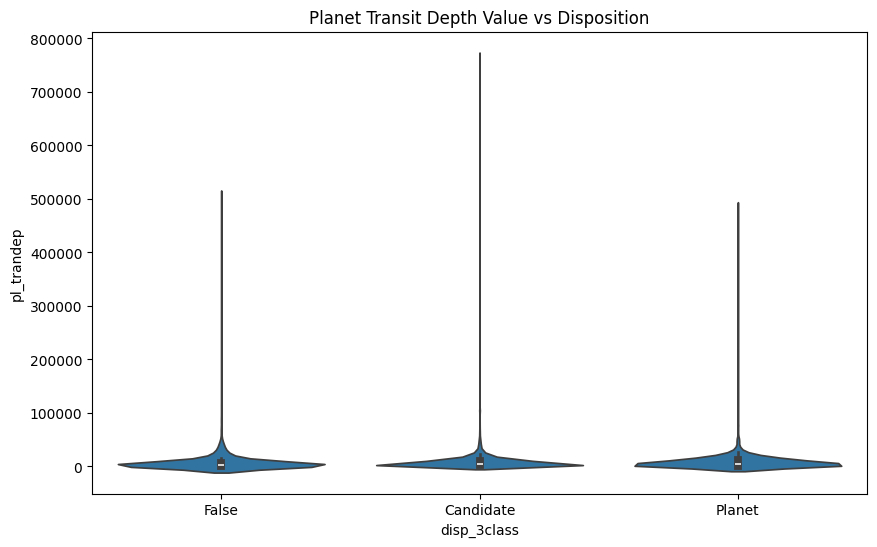

In [63]:
plt.figure(figsize=(10,6))
sns.violinplot(x="disp_3class", y="pl_trandep", data=df, density_norm="width")
plt.title("Planet Transit Depth Value vs Disposition")
plt.show()

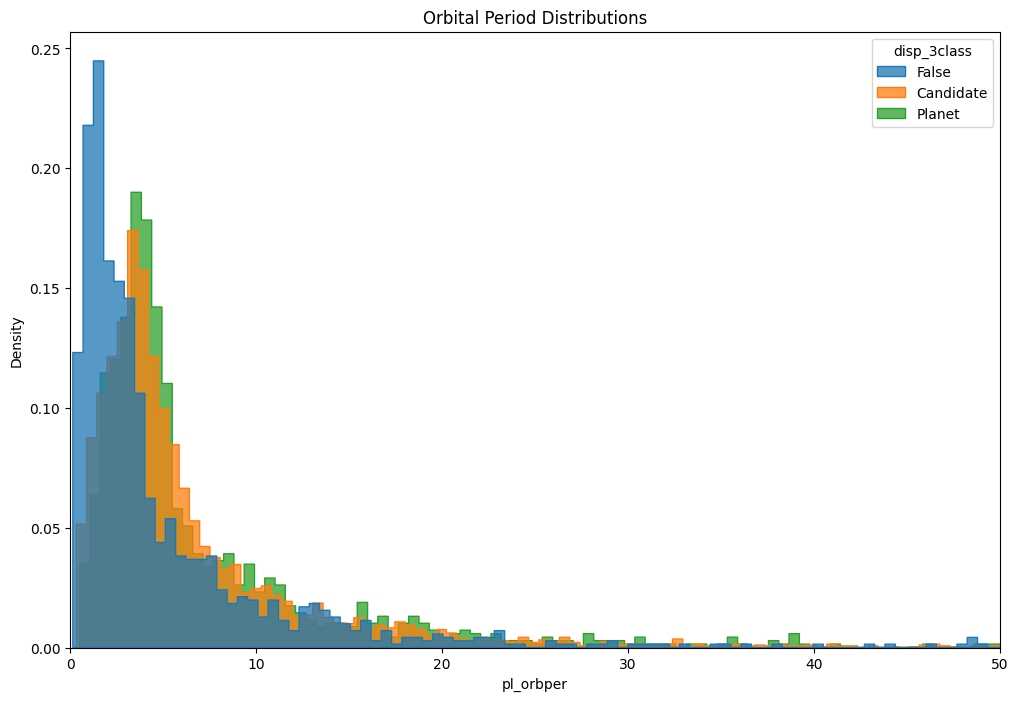

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.histplot(data=df, x="pl_orbper", hue="disp_3class", element="step", stat="density", common_norm=False, multiple="dodge")
plt.xlim(0, 50)  
plt.title("Orbital Period Distributions")
plt.show()


# quantitative feature-market relationships

**Mutual Information (MI): feature relevance to the target**

*Missing values*

In [65]:
X=numeric_df
X.isnull().sum().sort_values(ascending=False).head(15)


st_raderr1         1962
st_raderr2         1962
pl_radeerr2        1623
pl_radeerr1        1623
st_logg             856
st_disterr1         707
st_disterr2         707
st_rad              507
pl_rade             506
st_teff             161
st_pmraerr2         134
st_pmraerr1         134
pl_orbper           107
pl_trandurherr1      13
pl_trandurherr2      13
dtype: int64

In [66]:
X = X.dropna(axis=1, thresh=len(X)*0.7)  
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


In [67]:
from sklearn.feature_selection import mutual_info_classif

y = df["disp_3class"]
mi_scores = mutual_info_classif(X_imputed, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({
    "Feature": X.columns,
    "MI_Score": mi_scores
}).sort_values(by="MI_Score", ascending=False)

print(mi_df)


            Feature  MI_Score
19           st_rad  0.072075
14          st_tmag  0.068289
15      st_disterr1  0.067511
18          st_logg  0.066705
16      st_disterr2  0.064713
20       st_raderr1  0.061766
21       st_raderr2  0.058867
7   pl_trandurherr2  0.056638
12      pl_radeerr1  0.050454
6   pl_trandurherr1  0.050283
13      pl_radeerr2  0.050020
17          st_teff  0.043826
11          pl_rade  0.043425
4    pl_tranmiderr2  0.041335
3    pl_tranmiderr1  0.040954
9    pl_trandeperr1  0.030442
10   pl_trandeperr2  0.030279
8        pl_trandep  0.030056
1       st_pmraerr1  0.029793
0               dec  0.024398
2       st_pmraerr2  0.020807
5         pl_orbper  0.013224


3        st_pmralim  0.000000
9     pl_tranmidlim  0.000000
21    pl_trandeplim  0.000000
14      pl_trandurh  0.000000
17   pl_trandurhlim  0.000000
36       st_tefflim  0.000000
32       st_distlim  0.000000
29       st_tmaglim  0.000000
44        st_radlim  0.000000

# PrincipalComponentAnalysis

PCA reduces high-dimensional numeric features into 2D or 3D “summary axes” that explain the most variance.
If clusters separate → numeric features contain strong signals for classification, overlap → the task is harder (makes ML more challenging).
explained_variance_ratio_ shows how much of the total variance PC1 + PC2 capture (often 30–60%).

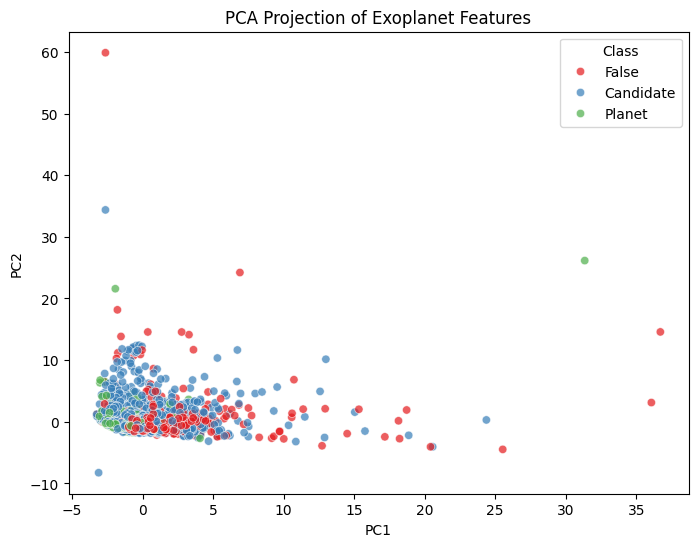

Explained variance ratio: [0.1344918  0.12100604]


In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_imputed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1","PC2"])
pca_df["Class"] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Class", alpha=0.7, palette="Set1")
plt.title("PCA Projection of Exoplanet Features")
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)


# Outliers IQR

In [69]:

def detect_outliers_iqr(df, features):
    outlier_summary = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        outlier_summary[col] = len(outliers)
    return pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["#Outliers"])

numeric_features = df.select_dtypes(include=['float64','int64']).columns
outlier_counts = detect_outliers_iqr(df, numeric_features)
print(outlier_counts.sort_values("#Outliers", ascending=False).head(10))


                #Outliers
pl_trandeperr2        894
pl_trandeperr1        894
st_pmraerr1           821
st_pmraerr2           821
pl_radeerr2           786
pl_radeerr1           786
pl_orbper             774
st_teff               698
st_disterr1           569
st_disterr2           569


# Class Balance

C:\Users\Влада\AppData\Local\Temp\ipykernel_5372\700457376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_norm.index, y=class_counts_norm.values, palette="Set2")


Text(0, 0.5, 'Percentage (%)')

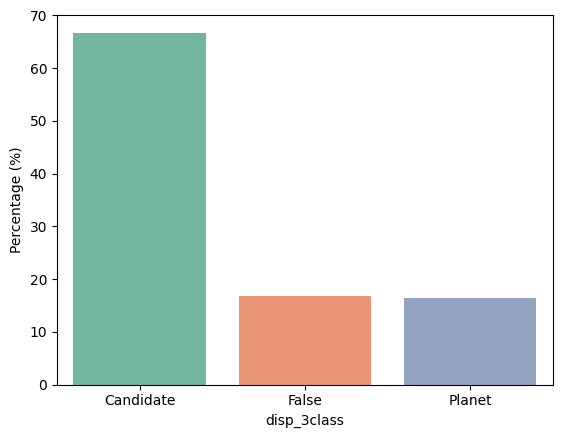

In [70]:
class_counts_norm = df['disp_3class'].value_counts(normalize=True) * 100
sns.barplot(x=class_counts_norm.index, y=class_counts_norm.values, palette="Set2")
plt.ylabel("Percentage (%)")


C:\Users\Влада\AppData\Local\Temp\ipykernel_5372\426575524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")


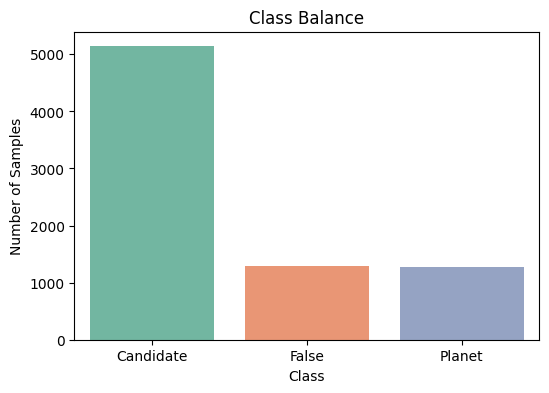

In [74]:
class_counts = df['disp_3class'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Class Balance")
plt.ylabel("Number of Samples")
plt.xlabel("Class")
plt.show()


# Stratified Feature Analysis

C:\Users\Влада\AppData\Local\Temp\ipykernel_5372\2463314293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="disp_3class", y="pl_rade", palette="Set2")


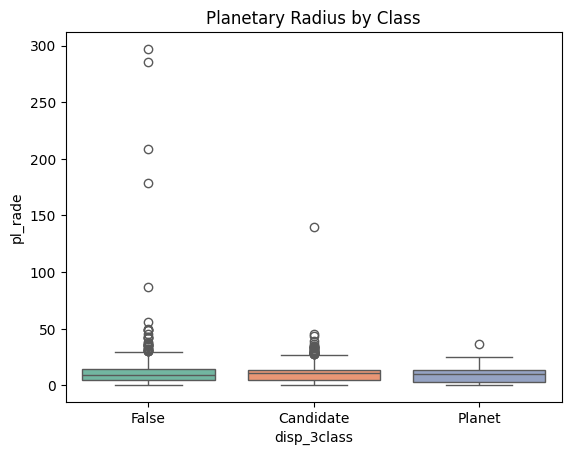

            pl_rade                                                       \
              count       mean        std       min       25%        50%   
disp_3class                                                                
Candidate    4763.0  10.374943   6.067541  0.553104  5.189280  10.919700   
False        1172.0  11.785815  15.985175  0.552507  4.976133   9.397150   
Planet       1258.0   8.792787   5.860437  0.591815  2.675842   9.684391   

                                   pl_orbper             ...            \
                   75%         max     count       mean  ...       75%   
disp_3class                                              ...             
Candidate    14.037828  140.194000    5065.0  21.202651  ...  8.200375   
False        14.906772  297.111726    1279.0  10.834787  ...  6.304659   
Planet       13.441802   36.509125    1248.0  10.803320  ...  8.627933   

                         pl_trandep                                        \
                     

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="disp_3class", y="pl_rade", palette="Set2") 
plt.title("Planetary Radius by Class")
plt.show()

group_stats = df.groupby("disp_3class")[["pl_rade","pl_orbper","pl_trandep"]].describe()
print(group_stats)


# Descriptive Statistics

In [72]:
desc_stats = df.describe().T  
print(desc_stats[["min","25%","50%","mean","75%","max","std"]])


                           min          25%          50%         mean  \
dec                 -89.471513   -43.340501     4.779380     1.192194   
st_pmraerr1           0.015000     0.038000     0.051000     0.228825   
st_pmraerr2          -8.000000    -0.080000    -0.051000    -0.228825   
st_pmdeclim           0.000000     0.000000     0.000000     0.000000   
pl_tranmiderr1        0.000008     0.001069     0.002027     0.003666   
pl_tranmiderr2       -3.305344    -0.003490    -0.002027    -0.003666   
pl_orbper             0.152076     2.491871     4.090083    17.746531   
pl_orbperlim          0.000000     0.000000     0.000000     0.000000   
pl_trandurherr1       0.001000     0.139000     0.263000     0.362561   
pl_trandurherr2    -167.615152    -0.441000    -0.263000    -0.362561   
pl_trandep           24.583493  1418.165449  4753.282994  8256.998307   
pl_trandeperr1        0.012536     9.289650    74.604720   489.911620   
pl_trandeperr2  -103577.016000  -299.145870   -74.6

In [34]:
grouped_medians = df.groupby("disp_3class").median(numeric_only=True)
print(grouped_medians.head())


                   dec  st_pmraerr1  st_pmraerr2  st_pmdecerr1  st_pmdecerr2  \
disp_3class                                                                    
Candidate     3.788601        0.050       -0.050         0.047        -0.047   
False        11.801057        0.054       -0.054         0.053        -0.053   
Planet        4.194573        0.056       -0.056         0.051        -0.051   

             st_pmdeclim  pl_tranmiderr1  pl_tranmiderr2  pl_orbper  \
disp_3class                                                           
Candidate            0.0        0.002135       -0.002135   4.320508   
False                0.0        0.002436       -0.002436   2.955188   
Planet               0.0        0.001188       -0.001188   4.228234   

             pl_orbpererr1  ...  st_teff  st_tefferr1  st_tefferr2  st_logg  \
disp_3class                 ...                                               
Candidate         0.000024  ...  5811.05      128.700     -128.700    4.320   
False 